In [93]:
# Avaliando a generalização de algoritmos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, StratifiedKFold

In [94]:
# toy datasets do scikit-learn;
# https://www.kaggle.com/ronitf/heart-disease-uci
base = pd.read_csv('heart.csv')
base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
X, y = base.drop('target',axis=1), base.target


In [96]:
# Arrays pra armazenar scores
# Escolha uma base de classificação e compare os classificadores 
# Logistic Regression e KNN do scikit-learn.
tentativas = 10 # Use pelo menos duas formas de avaliação e as repita pelo menos 10 vezes.
scores_convencionais_knn = np.zeros(tentativas)
scores_convencionais_lr = np.zeros(tentativas)
scores_aninhados_knn = np.zeros(tentativas)
scores_aninhados_lr = np.zeros(tentativas)

for i in range(tentativas):
    # Use pelo menos duas formas de avaliação 
    aninhado_cv = StratifiedKFold(shuffle=True)
    conv_cv = KFold(shuffle=True)
    
    # KNN
    pipeline_knn = Pipeline([
        ("padronizacao", StandardScaler()),
        ("knn", KNeighborsClassifier())
    ])
    param_knn = {'knn__n_neighbors':[3,5,7,9,11]}
    modelo_gs_knn = GridSearchCV(pipeline_knn, param_knn, cv=aninhado_cv)
    modelo_gs_knn.fit(X_train, y_train)
    scores_aninhados_knn[i] = modelo_gs_knn.best_score_
    scores_convencionais_knn[i] = cross_val_score(modelo_gs_knn, X, y, cv=conv_cv).mean()
    # LR
    pipeline_lr = Pipeline([
    ("padronizacao", StandardScaler()),
    ("lr", LogisticRegression())
    ])
    param_lr = {'lr__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    modelo_gs_lr = GridSearchCV(pipeline_lr, param_lr, cv=aninhado_cv)
    modelo_gs_lr.fit(X_train, y_train)
    scores_aninhados_lr[i] = modelo_gs_lr.best_score_
    scores_convencionais_lr[i] = cross_val_score(modelo_gs_lr, X, y, cv=conv_cv).mean()





(0.789704347826087, 0.8452772946859904)

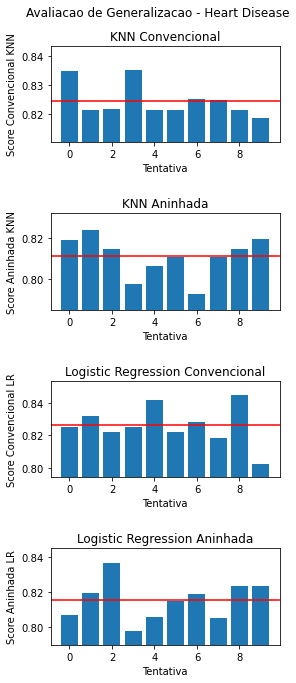

In [97]:
list_scores = [scores_convencionais_knn, scores_aninhados_knn,
               scores_convencionais_lr, scores_aninhados_lr]

fig, axs = plt.subplots(4, figsize=(5,10))
fig.suptitle('Avaliacao de Generalizacao - Heart Disease')
fig.tight_layout(pad=5.0)
axs[0].bar(range(tentativas), scores_convencionais_knn)
# Calcule a média das repetições de cada avaliação.
axs[0].axhline(np.mean(scores_convencionais_knn), color='red') 
axs[0].set_title("KNN Convencional")
axs[0].set_xlabel("Tentativa")
axs[0].set_ylabel("Score Convencional KNN")
axs[0].set_ylim(np.min(scores_convencionais_knn)*0.99, np.max(scores_convencionais_knn)*1.01)
axs[1].bar(range(tentativas), scores_aninhados_knn)
axs[1].axhline(np.mean(scores_aninhados_knn), color='red')
axs[1].set_title("KNN Aninhada")
axs[1].set_xlabel("Tentativa")
axs[1].set_ylabel("Score Aninhada KNN")
axs[1].set_ylim(np.min(scores_aninhados_knn)*0.99, np.max(scores_aninhados_knn)*1.01)
axs[2].bar(range(tentativas), scores_convencionais_lr)
axs[2].axhline(np.mean(scores_convencionais_lr), color='red')
axs[2].set_title("Logistic Regression Convencional")
axs[2].set_xlabel("Tentativa")
axs[2].set_ylabel("Score Convencional LR")
axs[2].set_ylim(np.min(scores_convencionais_lr)*0.99, np.max(scores_convencionais_lr)*1.01)
axs[3].bar(range(tentativas), scores_aninhados_lr)
axs[3].axhline(np.mean(scores_aninhados_lr), color='red')
axs[3].set_title("Logistic Regression Aninhada")
axs[3].set_xlabel("Tentativa")
axs[3].set_ylabel("Score Aninhada LR")
axs[3].set_ylim(np.min(scores_aninhados_lr)*0.99, np.max(scores_aninhados_lr)*1.01)

